In [1]:
from system import system
import phot
import matplotlib.pyplot as pl

In [2]:
class body:
    
    def __init__(self, mass, radius):
        self.mass = mass
        self.radius = radius

In [3]:
star = body(1, 1)
planet = body(1, 1)
moon = body(0.2, 0.3)

In [4]:
t = np.linspace(0, 200, 10000)
sys = system(star, planet, moon)

In [5]:
sys.set_planet_orbit(t0=10, e=0.2, P=100, Omega=180, w=10, i=89.5)
sys.set_moon_orbit(t0=10, e=0.3, P=28, Omega=180, w=0, i=45)

(-0.5573651880190417, 0.5573651880190417)

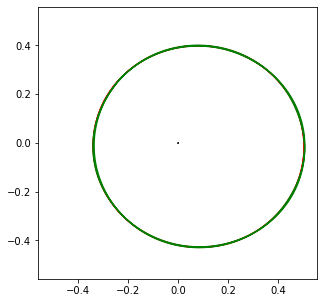

In [6]:
stcoords, plcoords, mocoords = sys.coords(t)

pl.figure(figsize=(5, 5))

stx, sty, stz = stcoords
plx, ply, plz = plcoords
mox, moy, moz = mocoords

pl.plot(stx, stz, color='k')
pl.plot(plx, plz, color='r')
pl.plot(mox, moz, color='g')

lims = -1.1*np.max(mox), 1.1*np.max(mox)
pl.xlim(lims)
pl.ylim(lims)

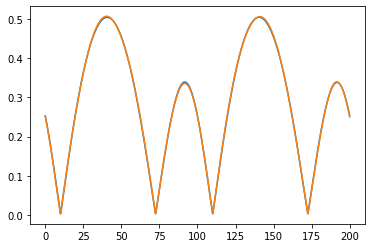

In [7]:
dpl, dmo = sys.sky_projected_distance(t)

pl.plot(t, dpl)
pl.plot(t, dmo)

CPU times: user 264 ms, sys: 3.42 ms, total: 267 ms
Wall time: 284 ms


(209.0, 211.0)

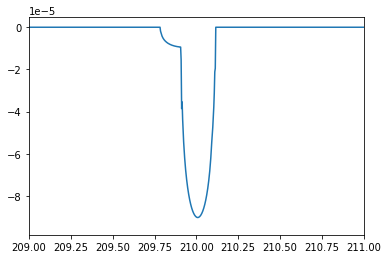

In [13]:
t = np.linspace(0, 300, 100000)
u = [0.5, 0.5]
%time flux = phot.flux(sys, t, u)
pl.plot(t, flux)
pl.xlim(209, 211)
#pl.axhline(1 - (sys.planet.radius / sys.star.radius)**2)

In [ ]:
import batman

In [ ]:
params = batman.TransitParams()
params.t0 = 10                       #time of inferior conjunction
params.per = 100                      #orbital period
params.rp = 0.0091577                     #planet radius (in units of stellar radii)
params.a = sys.starplanet.a / 0.00465047                       #semi-major axis (in units of stellar radii)
params.inc = 89.5                     #orbital inclination (in degrees)
params.ecc = 0.2                      #eccentricity
params.w = 10                      #longitude of periastron (in degrees)
params.u = u               #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [ ]:
m = batman.TransitModel(params, t)    #initializes model
%time flux_bm = m.light_curve(params)          #calculates light curve

In [ ]:
pl.plot(t, flux_bm-1)
pl.plot(t, flux)
pl.xlim(109, 111)
pl.axvline(10, color='k')

In [ ]:
import astropy.constants as ac

In [ ]:
ac.M_sun / ac.M_earth

In [ ]:
t = np.linspace(0, 100, 1000)
t

In [ ]:
28 * np.round(t / 28)

In [ ]:
np.isclose(t, 28 * np.round(t / 28), atol=1)

In [ ]:
type(1) is not np.ndarray

In [ ]:
import phot
import imp
imp.reload(phot)

In [ ]:
r = np.linspace(0, 1, 100)
pl.plot(r, phot.I_nonlinear(r, [0.5, 0.9]))

In [ ]:
z = np.linspace(0.1, 2, 1000)
%time phot.lightcurve(z, 0.1, [0.5, 0.5])
pl.plot(z, phot.lightcurve(z, 0.1, [0.5, 0.5]))

In [ ]:
np.arccos(-1)

In [ ]:
np.arccos(1.00001)

In [ ]:
np.arccos(0) - np.pi / 2

In [ ]:
np.arccos(0)

In [ ]:
[print(i) for i, c in enumerate([1, 2, 3])]

In [ ]:
a = np.array([1, 2, 3])

In [ ]:
np.concatenate([[1], a])